# Sumit bhattacharjee


# GRIP Task 2: Finding optimum no. of clusters

In [1]:
#importing main library
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#import data using pandas
df = pd.read_csv("C:/Users/My/Desktop/spark foundation/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Preprocessing and EDA

In [3]:
#convert species into numerical from by label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])
df
df.isnull().sum()# missing values sort out

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
#Dropping ID column because its just a serial no.
#we have to find out optimum no. of clusters so we make a new data frame that won't have species as a column
x = df.drop(['Species','Id'],axis = 1)
y = df['Species']

In [5]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [7]:
x.shape

(150, 4)

In [8]:
x.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
x.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


Sepal Length has got good linear correlation with Petal Length and Petal Width. Whereas Petal dimensions are highly correlated to each other. Also, Sepal Width is fairly correlated to Petal Length and Petal Width.

# Visualisation
Visualisation of data by using scatter plot to see which column is better for find out the optimum no. of clusturing

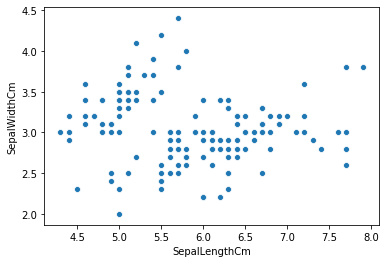

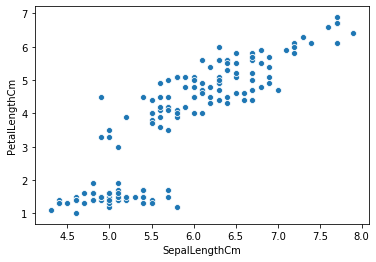

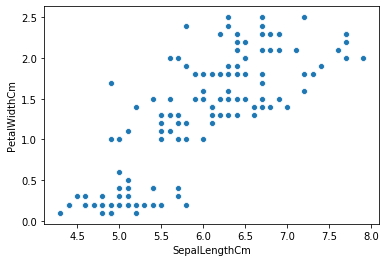

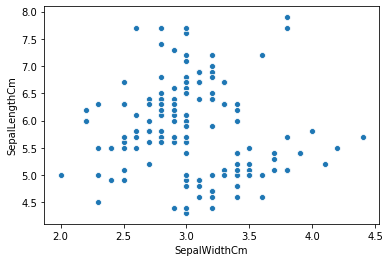

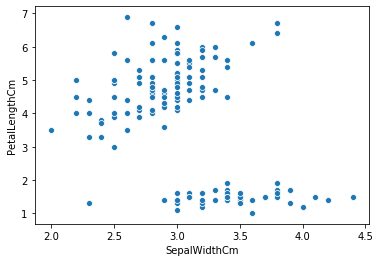

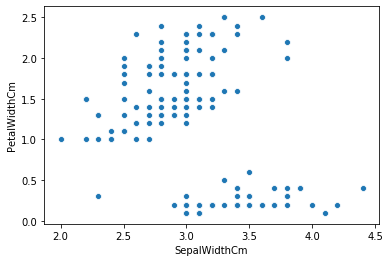

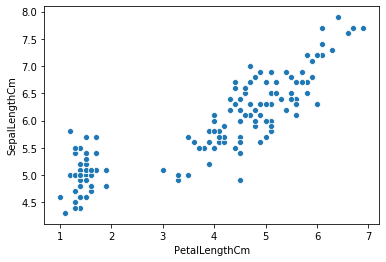

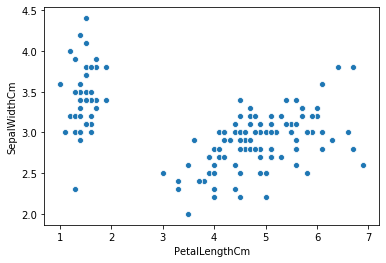

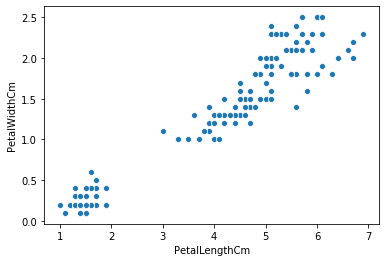

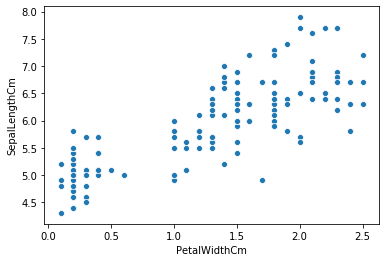

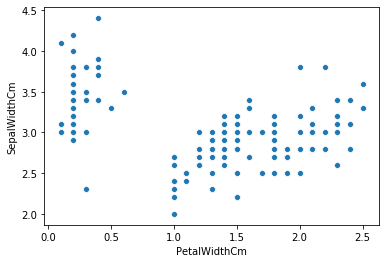

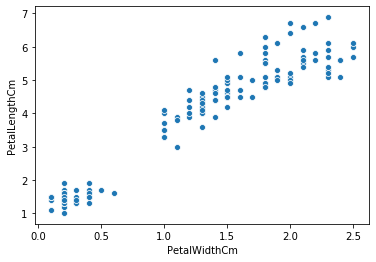

In [11]:
for i in x.columns:
    for j in x.columns:
        if i!=j:
            sb.scatterplot(i,j,data=x)
            plt.show()

From above scatterplots the basic inference we can draw is yes, there is existence of two clusters atleast. As we can see all the scatter plots are divided clearly in two bundles.

Information from the above plots lets finalise the range of number of clusters to be 2 to 9.
Using KMeans algorithm we'll first plot Elbow Curve, Silhouette Score, Calinski Harabasz Score, so as to ascertain optimum number of clusters.

In [12]:
cluster_range = range(2,10)
cluster_wss = []
from sklearn.cluster import KMeans
for num_cluster in cluster_range:
    cluster = KMeans(num_cluster,random_state=25)
    cluster.fit(x)
    cluster_wss.append(cluster.inertia_)

In [13]:
cluster_df = pd.DataFrame({'num_cluster':cluster_range,'cluster_wss':cluster_wss})
cluster_df

,num_cluster,cluster_wss
0,2,152.368706
1,3,78.940841
2,4,57.317873
3,5,46.561630
4,6,38.930963
5,7,34.636328
6,8,30.009659
7,9,28.170474


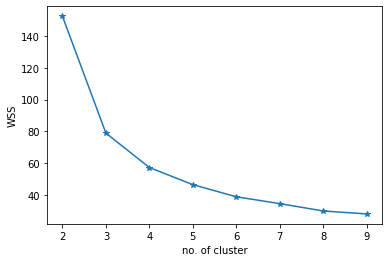

In [14]:
plt.xlabel('no. of cluster')
plt.ylabel('WSS')
plt.plot(cluster_df['num_cluster'],cluster_df['cluster_wss'],marker = '*')

Plotting Elbow Curve above we can see the optimum number of clusters are '3' as the within cluster sum of squares doesn't decrease substantially after 3 clusters. This can also be ascertain by the 'clusters_df' dataframe above.

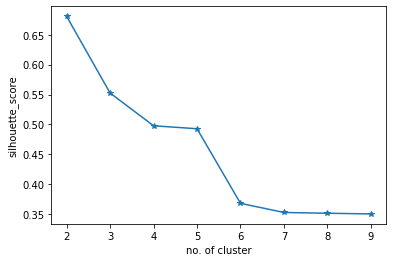

In [15]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
sil = []
for num_cluster in cluster_range:
    cluster = KMeans(num_cluster,random_state = 25)
    cluster.fit(x)
    score = silhouette_score(x,cluster.labels_)
    sil.append(score)
plt.xlabel('no. of cluster')
plt.ylabel('silhouette_score')
plt.plot(cluster_range,sil,marker = '*')
plt.show()

Silhouette score calculates the goodness of a clutering technique, ranging from -1 to 1.
1 being the best, 0 being no significant difference between clusters and -1 being the wrong clusters assigned.
So from the above plot, number of clusters '2' seem to have high silhouette score than '3', but considering what elbow plot has given us we can still consider optimum number of clusters to be '3' as its silhouette score is pretty good.

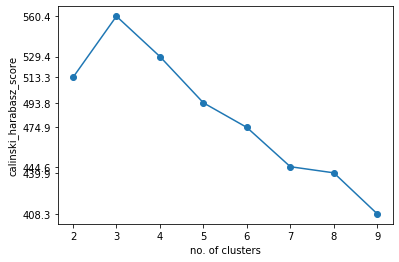

In [20]:
cal = []
for num_cluster in cluster_range:
    mod = KMeans(num_cluster,random_state = 25)
    mod.fit(x)
    score = calinski_harabasz_score(x,mod.labels_)
    cal.append(score)
plt.plot(cluster_range,cal,marker = 'o')
plt.xlabel('no. of clusters')
plt.ylabel('calinski_harabasz_score')
plt.xticks(cluster_range)
plt.yticks(cal)
plt.show()


Calinski Harabasz Score is the ratio of between cluster variance to within cluster variance.
From the above plot number of clusters '3' seem to give best Calinski Score.

In [21]:
df_2 = x.copy()
df_3 = x.copy()

In [24]:
Kclusters = KMeans (n_clusters = 2,random_state = 25)
Kclusters.fit(df_2)
df_2['clus'] = Kclusters.predict(df_2)
Kclusters = KMeans (n_clusters = 3,random_state = 25)
Kclusters.fit(df_3)
df_3['clus'] = Kclusters.predict(df_3)

In [28]:
clus_profile = df_2.groupby(df_2['clus']).mean()
clus_profile

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clus,,,,
0,6.301031,2.886598,4.958763,1.695876
1,5.005660,3.360377,1.562264,0.288679


In [29]:
clus_profile_ = df_3.groupby(df_3['clus']).mean()
clus_profile_

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clus,,,,
0,5.006000,3.418000,1.464000,0.244000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


when take 2 clusters


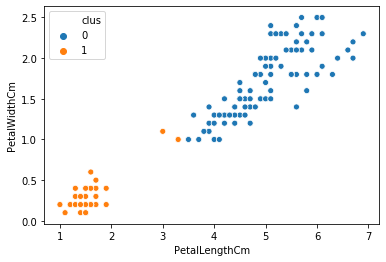

when take 3 cluster


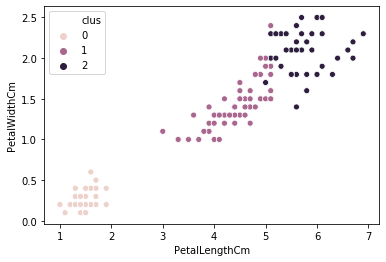

In [32]:
#Visualisation no. of cluster
print('when take 2 clusters')
sb.scatterplot(df_2[df_2.columns[2]],df_2[df_2.columns[3]],hue = df_2[df_2.columns[-1]])
plt.show()
print('when take 3 cluster')
sb.scatterplot(df_3[df_3.columns[2]],df_3[df_3.columns[3]],hue = df_3[df_3.columns[-1]])
plt.show()

when take 2 clusters


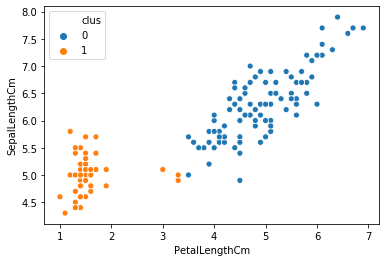

when take 3 clusters


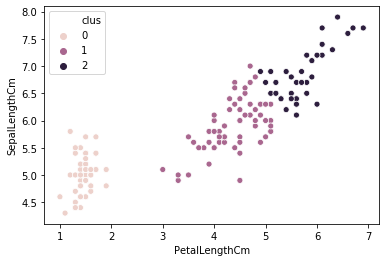

In [35]:
print('when take 2 clusters')
sb.scatterplot(df_2[df_2.columns[2]],df_2[df_2.columns[0]],hue = df_2[df_2.columns[-1]])
plt.show()
print('when take 3 clusters')
sb.scatterplot(df_3[df_3.columns[2]],df_3[df_3.columns[0]],hue = df_3[df_3.columns[-1]])
plt.show()

On ascertaining number of clusters '2' and number of clusters '3', we can see 3 clusters better segregates the data not only visually but also the tables above clearly shows the average values of the variables are better defined.

Hence the optimum number of Clusters are 3.


we can do the accuracy check also because in data set we get the target variable also.

In [38]:
from sklearn.metrics import accuracy_score
print('for clusters 2 ',accuracy_score(df_2['clus'],y))
print('for cluster 3' ,accuracy_score(df_3['clus'],y))

for clusters 2  0.02
for cluster 3 0.8933333333333333


from accuracy we can prove that if we get the no. of cluster three then the model gives us better performance